# **Import libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LinearRegression, SGDRegressor, Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, ExtraTreesRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
#from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

from sklearn.metrics import mean_squared_error

# **Read data**

In [ ]:
df = pd.read_csv('bmw.csv')

df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


In [ ]:
'''
Ideas:
1. Price prediction
2. Plot main distributions
3. EDA
4. ETL
'''

'\nIdeas:\n1. Price prediction\n2. Plot main distributions\n3. EDA\n'

# **Check data**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10781 non-null  object 
 1   year          10781 non-null  int64  
 2   price         10781 non-null  int64  
 3   transmission  10781 non-null  object 
 4   mileage       10781 non-null  int64  
 5   fuelType      10781 non-null  object 
 6   tax           10781 non-null  int64  
 7   mpg           10781 non-null  float64
 8   engineSize    10781 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 758.2+ KB


In [ ]:
df.isna().sum()

,0
model,0
year,0
price,0
transmission,0
mileage,0
fuelType,0
tax,0
mpg,0
engineSize,0


In [ ]:
print(f'Duplicated value: {df.duplicated().sum().item()}')

Duplicated value: 117


In [ ]:
df.describe(include='all')

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
count,10781,10781.000000,10781.000000,10781,10781.000000,10781,10781.000000,10781.000000,10781.000000
unique,24,NaN,NaN,3,NaN,5,NaN,NaN,NaN
top,3 Series,NaN,NaN,Semi-Auto,NaN,Diesel,NaN,NaN,NaN
freq,2443,NaN,NaN,4666,NaN,7027,NaN,NaN,NaN
mean,NaN,2017.078935,22733.408867,NaN,25496.986550,NaN,131.702068,56.399035,2.167767
std,NaN,2.349038,11415.528189,NaN,25143.192559,NaN,61.510755,31.336958,0.552054
min,NaN,1996.000000,1200.000000,NaN,1.000000,NaN,0.000000,5.500000,0.000000
25%,NaN,2016.000000,14950.000000,NaN,5529.000000,NaN,135.000000,45.600000,2.000000
50%,NaN,2017.000000,20462.000000,NaN,18347.000000,NaN,145.000000,53.300000,2.000000
75%,NaN,2019.000000,27940.000000,NaN,38206.000000,NaN,145.000000,62.800000,2.000000


- The categorical value:
    - Model.
    - Transmission.
    - Fuel type.
    
- The numeric value:
    - Price.
    - Year.
    - Mileage.
    - Tax.
    - MPG.
    - Engine size.

# **Data analysis**

In [ ]:
sns.set_style('darkgrid', {'grid.color': '0.5', 'grid.linestyle': ':'})

# *1 - Model*

,count
model,
3 Series,2443
1 Series,1969
2 Series,1229
5 Series,1056
4 Series,995
X1,804
X3,551
X5,468
X2,288


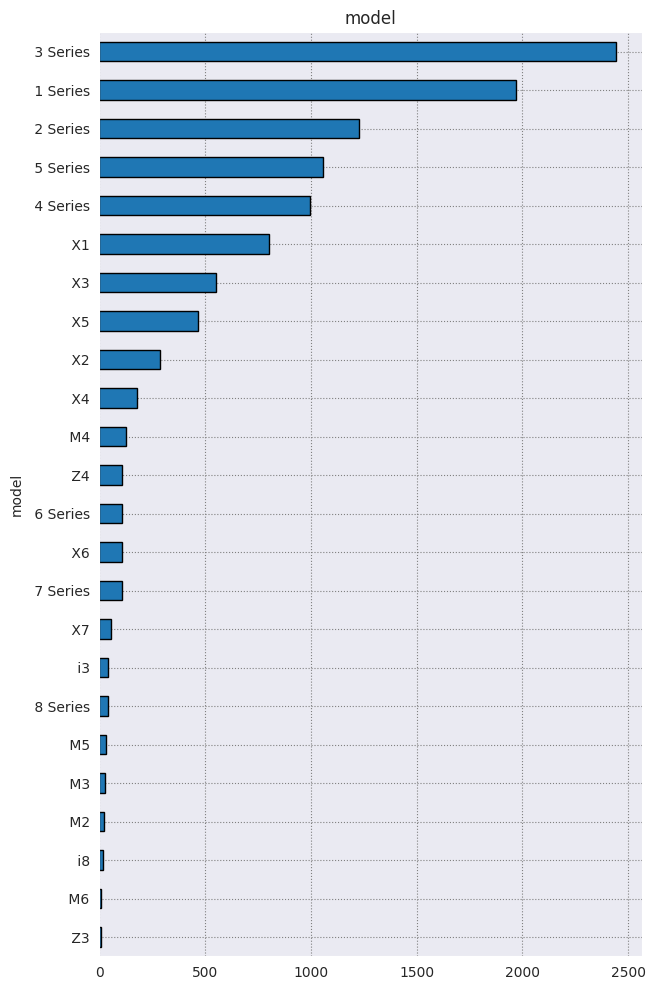

In [ ]:
model = df['model'].value_counts()

plt.figure(figsize=(7,12))
model = model.sort_values(ascending=True)
model.plot(kind='barh', edgecolor='black', title='model')
pd.DataFrame(model.sort_values(ascending=False))

# *2 - Transmission*

,count
transmission,
Semi-Auto,4666
Automatic,3588
Manual,2527


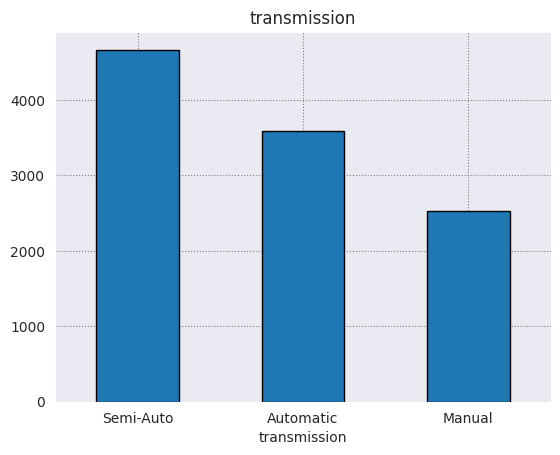

In [ ]:
transmission = df['transmission'].value_counts()

transmission.plot(kind='bar', edgecolor='black', title='transmission')
plt.xticks(rotation=0)
pd.DataFrame(transmission)

# *3 - Fuel type*

,count
fuelType,
Diesel,7027
Petrol,3417
Hybrid,298
Other,36
Electric,3


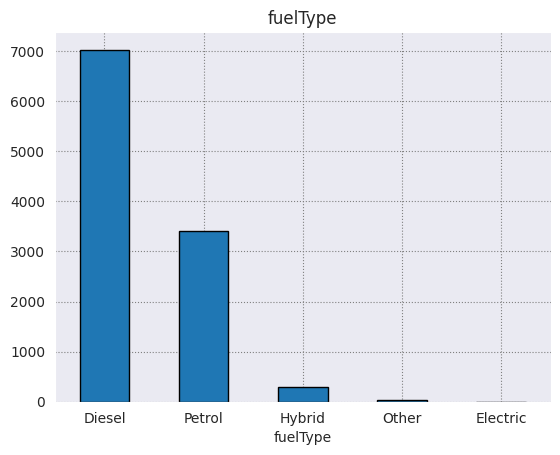

In [ ]:
ft = df['fuelType'].value_counts()

ft.plot(kind='bar', edgecolor='black', title='fuelType')
plt.xticks(rotation=0)
pd.DataFrame(ft)

# *4 - Year*

<Axes: title={'center': 'car year manufacture'}, ylabel='year'>

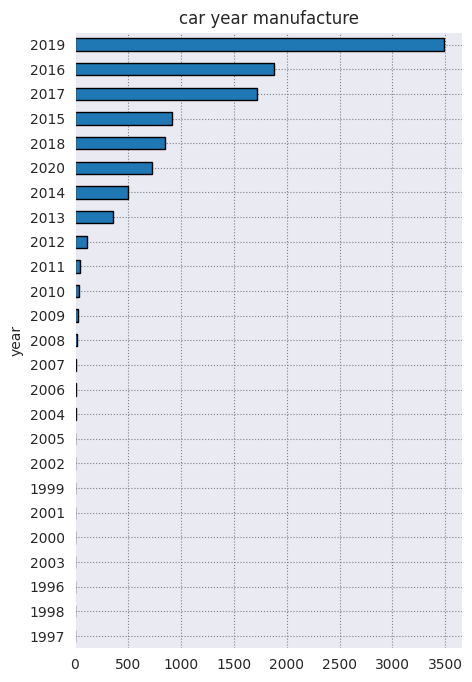

In [ ]:
year = df['year'].value_counts()

plt.figure(figsize=(5,8))

year = year.sort_values(ascending=True)
year.plot(kind='barh', edgecolor='black', title='car year manufacture')
#pd.DataFrame(year.sort_values(ascending=False))

# **Preprocessing**

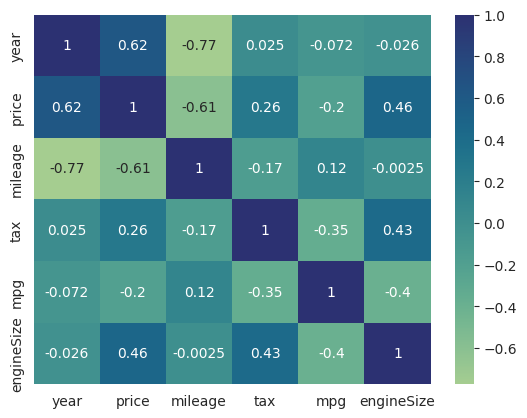

In [ ]:
x = df.corr(numeric_only=True)

sns.heatmap(x, annot=True, cmap='crest')

plt.show()

### ***1 - encoding***

In [ ]:
df = pd.read_csv('bmw.csv')

df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


In [ ]:
encoder = LabelEncoder()

df['model'] = encoder.fit_transform(df['model'])
df['transmission'] = encoder.fit_transform(df['transmission'])
df['fuelType'] = encoder.fit_transform(df['fuelType'])

In [ ]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,4,2014,11200,0,67068,0,125,57.6,2.0
1,5,2018,27000,0,14827,4,145,42.8,2.0
2,4,2016,16000,0,62794,0,160,51.4,3.0
3,0,2017,12750,0,26676,0,145,72.4,1.5
4,6,2014,14500,0,39554,0,160,50.4,3.0


### ***2 - divid input & output***

In [ ]:
y = df.iloc[ : , 2]

In [ ]:
y

,price
0,11200
1,27000
2,16000
3,12750
4,14500
...,...
10776,19000
10777,14600
10778,13100
10779,9930


In [ ]:
x1 = df.iloc[ : , 0 : 2]

In [ ]:
x1

,model,year
0,4,2014
1,5,2018
2,4,2016
3,0,2017
4,6,2014
...,...,...
10776,15,2016
10777,4,2016
10778,2,2017
10779,0,2014


In [ ]:
x2 = df.iloc[ : , 3 : ]

In [ ]:
x2

,transmission,mileage,fuelType,tax,mpg,engineSize
0,0,67068,0,125,57.6,2.0
1,0,14827,4,145,42.8,2.0
2,0,62794,0,160,51.4,3.0
3,0,26676,0,145,72.4,1.5
4,0,39554,0,160,50.4,3.0
...,...,...,...,...,...,...
10776,0,40818,0,150,54.3,2.0
10777,0,42947,0,125,60.1,2.0
10778,1,25468,4,200,42.8,2.0
10779,0,45000,0,30,64.2,2.0


In [ ]:
x = pd.concat([x1, x2], axis=1)

In [ ]:
x

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,4,2014,0,67068,0,125,57.6,2.0
1,5,2018,0,14827,4,145,42.8,2.0
2,4,2016,0,62794,0,160,51.4,3.0
3,0,2017,0,26676,0,145,72.4,1.5
4,6,2014,0,39554,0,160,50.4,3.0
...,...,...,...,...,...,...,...,...
10776,15,2016,0,40818,0,150,54.3,2.0
10777,4,2016,0,42947,0,125,60.1,2.0
10778,2,2017,1,25468,4,200,42.8,2.0
10779,0,2014,0,45000,0,30,64.2,2.0


### ***3- scaling***

In [ ]:
scaler = MinMaxScaler()

x = scaler.fit_transform(x)

In [ ]:
x

array([[0.17391304, 0.75      , 0.        , ..., 0.21551724, 0.11197077,
        0.3030303 ],
       [0.2173913 , 0.91666667, 0.        , ..., 0.25      , 0.08016334,
        0.3030303 ],
       [0.17391304, 0.83333333, 0.        , ..., 0.27586207, 0.09864603,
        0.45454545],
       ...,
       [0.08695652, 0.875     , 0.5       , ..., 0.34482759, 0.08016334,
        0.3030303 ],
       [0.        , 0.75      , 0.        , ..., 0.05172414, 0.12615517,
        0.3030303 ],
       [0.56521739, 0.875     , 0.        , ..., 0.21551724, 0.11197077,
        0.3030303 ]])

In [ ]:
y_df = y.to_frame()

y = scaler.fit_transform(y_df)

In [ ]:
y

array([[0.08179558],
       [0.21103259],
       [0.12105745],
       ...,
       [0.09733674],
       [0.07140754],
       [0.12090204]])

# **Train & Test:**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True, random_state=42)

# **ML Model:**

In [ ]:
# Define models and their parameter grids
models_and_params = [
    (LinearRegression(), {}),  # No hyperparameters to tune for LinearRegression
    (SGDRegressor(), {'alpha': [0.0001, 0.001, 0.01], 'max_iter': [1000, 2000]}),
    (Lasso(), {'alpha': [0.01, 0.1, 1]}),
    (Ridge(), {'alpha': [0.01, 0.1, 1]}),
    (ElasticNet(), {'alpha': [0.01, 0.1, 1], 'l1_ratio': [0.1, 0.5, 0.9]}),
    (SVR(), {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}),
    (KNeighborsRegressor(), {'n_neighbors': [3, 5, 7]}),
    (DecisionTreeRegressor(), {'max_depth': [None, 10, 20], 'min_samples_split': [2, 5]}),
    (RandomForestRegressor(), {'n_estimators': [50, 100], 'max_depth': [None, 10]}),
    (BaggingRegressor(), {'n_estimators': [10, 50]}),
    (ExtraTreesRegressor(), {'n_estimators': [50, 100], 'max_depth': [None, 10]}),
    (AdaBoostRegressor(), {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1, 1]}),
    (XGBRegressor(verbose=0), {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1]}),
    (LGBMRegressor(verbose=0), {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1]})
]

# Model names
models_names = [
    'LinearRegression', 'SGDRegressor', 'Lasso', 'Ridge', 'ElasticNet',
    'SVR', 'KNeighborsRegressor', 'DecisionTreeRegressor',
    'RandomForestRegressor', 'BaggingRegressor', 'ExtraTreesRegressor',
    'AdaBoostRegressor', 'XGBRegressor', 'LGBMRegressor'
]

# Initialize results storage
trained_models = []
squared_errors = []
train_score = []
test_score = []
ratio = []
rate = []

# Perform GridSearchCV for each model
for (model, param_grid), name in zip(models_and_params, models_names):
    print(f"Training and tuning {name}...")
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
    grid_search.fit(x_train, y_train)
    best_model = grid_search.best_estimator_

    # Save the best model
    trained_models.append(best_model)

    # Calculate scores and metrics
    train_acc = best_model.score(x_train, y_train)
    test_acc = best_model.score(x_test, y_test)
    train_score.append(train_acc)
    test_score.append(test_acc)

    # Mean Squared Error
    y_pred = best_model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    squared_errors.append(f'{mse * 100:.2f}%')

    # Ratio difference
    diff = train_acc - test_acc
    ratio.append(f'{diff * 100:.2f}%')

    # Evaluate model state
    if train_acc <= 0.65 and test_acc <= 0.65:
        rate.append('bad')
    elif train_acc > test_acc * 1.10 or train_acc >= 1.00:
        rate.append('overfit')
    elif 0.65 < train_acc < 0.80 and 0.65 < test_acc < 0.80:
        rate.append('middle')
    elif 0.80 <= train_acc < 1.00 and 0.80 <= test_acc < 1.00:
        rate.append('good')
    elif train_acc >= 0.80 and test_acc < 0.80:
        rate.append('high train, low test')
    else:
        rate.append('unknown')

# Create a DataFrame to summarize the results
model_score = pd.DataFrame({
    'Model': models_names,
    'Train score': [f'{round(score * 100, 2)}%' for score in train_score],
    'Test score': [f'{round(score * 100, 2)}%' for score in test_score],
    'Ratio difference': ratio,
    'Evaluate model': rate,
    'Squared error': squared_errors
})

# Show the result
model_score

Training and tuning LinearRegression...
Training and tuning SGDRegressor...


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training and tuning Lasso...
Training and tuning Ridge...
Training and tuning ElasticNet...
Training and tuning SVR...


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training and tuning KNeighborsRegressor...
Training and tuning DecisionTreeRegressor...
Training and tuning RandomForestRegressor...


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Training and tuning BaggingRegressor...


/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_bagging.py:568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


Training and tuning ExtraTreesRegressor...


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Training and tuning AdaBoostRegressor...


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training and tuning XGBRegressor...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [19:06:06] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Training and tuning LGBMRegressor...


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


,Model,Train score,Test score,Ratio difference,Evaluate model,Squared error
0,LinearRegression,74.54%,74.1%,0.43%,middle,0.22%
1,SGDRegressor,59.77%,58.96%,0.81%,bad,0.36%
2,Lasso,5.42%,5.34%,0.08%,bad,0.82%
3,Ridge,74.54%,74.1%,0.43%,middle,0.22%
4,ElasticNet,59.6%,58.77%,0.83%,bad,0.36%
5,SVR,77.33%,75.86%,1.46%,middle,0.21%
6,KNeighborsRegressor,96.6%,92.66%,3.94%,good,0.06%
7,DecisionTreeRegressor,95.86%,90.57%,5.29%,good,0.08%
8,RandomForestRegressor,99.16%,94.3%,4.86%,good,0.05%
9,BaggingRegressor,99.18%,94.3%,4.88%,good,0.05%
